In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calc_cagr(end_val, start_val, periods):
    return (end_val / start_val) ** (1 / periods) - 1

In [3]:
stocks = ["WSM", "RH", "BBWI", "TPR", "DKS", "ROST", "TJX", "FBIN", "COST"]
pe_ratios = []
cagrs = []
market_caps = []

for stock in stocks:
    ticker = yf.Ticker(stock)
    hist = ticker.history(period="3y")
    start_val = hist["Close"].iloc[0]
    end_val = hist["Close"].iloc[-1]
    cagr = calc_cagr(end_val, start_val, 5)
    cagrs.append(cagr)
    pe_ratio = ticker.info["trailingPE"]
    pe_ratios.append(pe_ratio)
    market_cap = ticker.info["marketCap"]
    market_caps.append(market_cap)

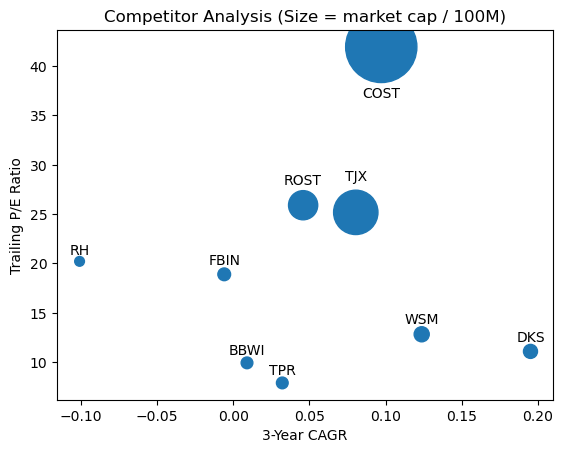

In [10]:
sizes = [mc / 1e8 for mc in market_caps]
plt.scatter(cagrs, pe_ratios, s=sizes)
for i, txt in enumerate(stocks):
    if txt == "COST":
        offset = -np.sqrt(sizes[i]) * 0.1
        plt.annotate(txt, (cagrs[i], pe_ratios[i] + offset), ha="center")
    else:
        offset = np.sqrt(sizes[i]) * 0.1
        plt.annotate(txt, (cagrs[i], pe_ratios[i] + offset), ha="center")

plt.xlabel("3-Year CAGR")
plt.ylabel("Trailing P/E Ratio")
plt.title("Competitor Analysis (Size = market cap / 100M)")
plt.show()